# ASTR3800 Final Project
### Thor Breece

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy import units as u
from astropy import constants as co
import linear_least_squares as lsq
from scipy.stats import pearsonr

## 2 Event Demographics

In [2]:
ligo = pd.read_csv("LIGO.csv")

The circled data point in the below plot represents the maximum redshift in the given dataset. 
Finding this data point within the data we find that the redshift limit is 1.18


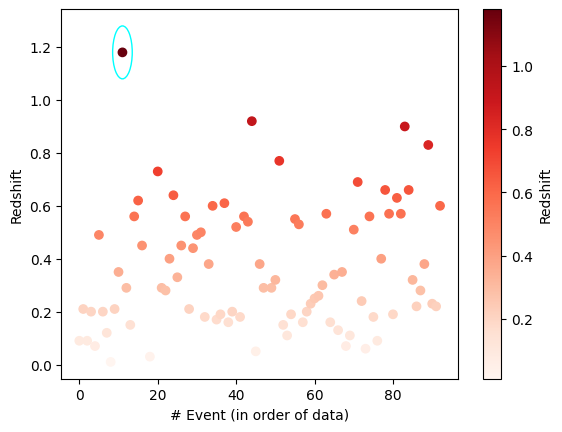

In [3]:
# 1.

event_arr = np.linspace(0,92,93)
plt.scatter(event_arr, ligo["redshift"], c=ligo["redshift"], cmap="Reds")
cbar = plt.colorbar()
cbar.set_label("Redshift")
plt.xlabel("# Event (in order of data)")
plt.ylabel("Redshift")

fig = plt.gcf()
ax = fig.gca()
e = Ellipse((ligo["redshift"].argmax(), ligo["redshift"].max()), 5, 0.2, fc='None', ec='cyan')
ax.add_patch(e)
print(f'The circled data point in the below plot represents the maximum redshift in the given dataset. \nFinding this data point within the data we find that the redshift limit is {ligo["redshift"].max()}' )


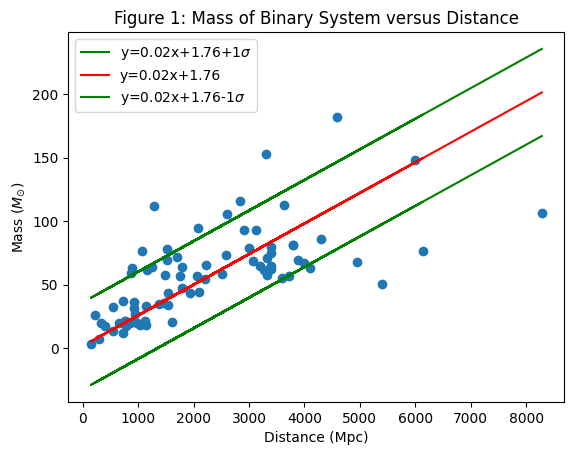

In [4]:
# 2.
ligo = ligo[ligo['luminosity_distance'].notna()]
ligo = ligo[ligo['total_mass_source'].notna()]
# ligo = ligo[ligo['luminosity_distance_upper'].notna()]
# ligo = ligo[ligo['luminosity_distance_lower'].notna()]
# ligo = ligo[ligo['total_mass_source_upper'].notna()]
# ligo = ligo[ligo['total_mass_source_lower'].notna()]
plt.scatter(ligo["luminosity_distance"], ligo["total_mass_source"])
plt.xlabel("Distance (Mpc)")
plt.ylabel(r"Mass ($M_{\odot}$)");
uslope = lsq.m_wtd(ligo['luminosity_distance'], ligo['total_mass_source'], ligo['total_mass_source_upper'])
uintercept = lsq.b_wtd(ligo['luminosity_distance'], ligo['total_mass_source'], ligo['total_mass_source_upper'])
model = uslope * ligo["luminosity_distance"] + uintercept
div = ligo["total_mass_source"].std()
plt.plot(ligo["luminosity_distance"], model+div, color="g", label=f'y={uslope:.2f}x+{uintercept:.2f}+$1\sigma$')
plt.plot(ligo["luminosity_distance"], model, color="r", label=f'y={uslope:.2f}x+{uintercept:.2f}')
plt.plot(ligo["luminosity_distance"], model-div, color="g", label=f'y={uslope:.2f}x+{uintercept:.2f}-$1\sigma$')
plt.title("Figure 1: Mass of Binary System versus Distance")
plt.legend()

Text(0.5, 1.0, 'Figure 2: Residuals of mass data')

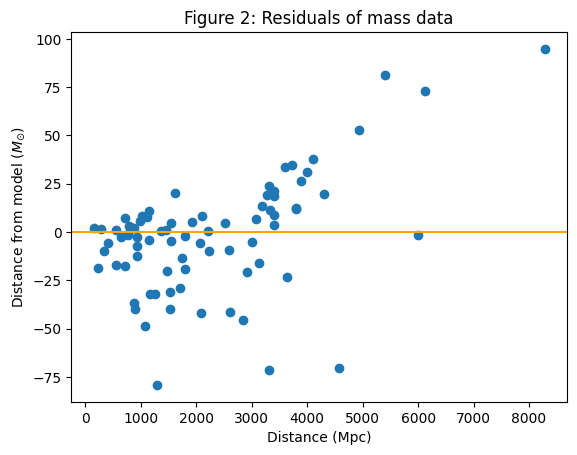

In [5]:
resid = model - ligo["total_mass_source"]

plt.scatter(ligo["luminosity_distance"], resid)
plt.axhline(y=0, c='orange')
plt.xlabel("Distance (Mpc)")
plt.ylabel(r"Distance from model ($M_{\odot}$)")
plt.title("Figure 2: Residuals of mass data")

In [6]:
# from tutorial 08
def cov(x, y):
    N = len(x)
    mean_x = np.average(x)
    mean_y = np.average(y)
    return (1/N)*(np.sum((x - mean_x) * (y - mean_y)))
def cor(x,y):
    mean_x = np.average(x)
    mean_y = np.average(y)
    numerator = np.sum((x - mean_x)*(y-mean_y))
    denominator = np.sqrt(np.sum((x-mean_x)**2) * np.sum((y-mean_y)**2))
    return numerator / denominator
print(f'The covariance statistic between Mass and Distance is {cov(ligo["total_mass_source"],ligo["luminosity_distance"]):.2f} and the correlation coefficient is {cor(ligo["total_mass_source"],ligo["luminosity_distance"]):.2f}')
r, p = pearsonr(ligo["total_mass_source"],ligo["luminosity_distance"])
print(f'The probability of the correlation coefficient found in Mass and Distance being found in uncorrelated data is p = {p*100:.2g}%. So it is highly likely that the two are correlated')

The covariance statistic between Mass and Distance is 35672.91 and the correlation coefficient is 0.67
The probability of the correlation coefficient found in Mass and Distance being found in uncorrelated data is p = 1.9e-09%. So it is highly likely that the two are correlated


In [7]:
# 3.
ligo = ligo[ligo["total_mass_source"].notna()]
ligo = ligo[ligo["final_mass_source"].notna()]
mass_frac = 1 - (ligo["final_mass_source"] /ligo["total_mass_source"])
mass_frac_avg = np.average(mass_frac)
mass_frac_std = np.std(mass_frac)
print(f'The AMOUNT of mass that is converted into gravitational waves is the difference between the total mass and the final mass. \nThe mass fraction that is converted to GWs will be 1 - (total mass / final mass). \nThe average fraction of mass converted to GWs is {mass_frac_avg:.3f} and the spread, or standard deviation in this fraction is {mass_frac_std:.5f}.')

The AMOUNT of mass that is converted into gravitational waves is the difference between the total mass and the final mass. 
The mass fraction that is converted to GWs will be 1 - (total mass / final mass). 
The average fraction of mass converted to GWs is 0.043 and the spread, or standard deviation in this fraction is 0.01035.


from tutorial 12 part 1.9 we get a inband peak duration which I will be using as the assumption for the caluclation of GW luminosity


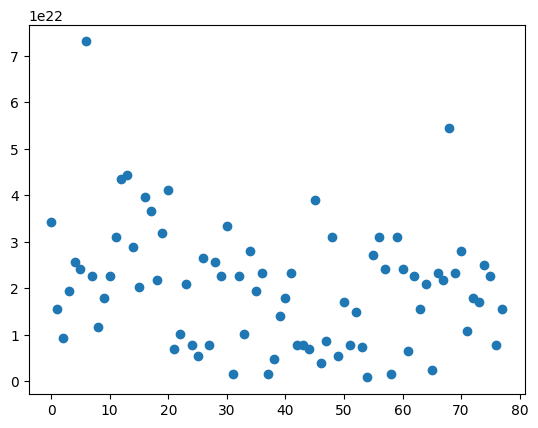

In [8]:
# 4.
m_tot = ligo["total_mass_source"].to_numpy()
m_fin = ligo["final_mass_source"].to_numpy()
dM = (m_tot - m_fin) * u.M_sun
E = dM * co.c ** 2
E = [i.decompose() for i in E]
duration = 0.06 * u.second
gwL = [(i / duration).to('L_sun') for i in E]
gwL_plotting = [i.value for i in gwL]
print("from tutorial 12 part 1.9 we get a inband peak duration which I will be using as the assumption for the caluclation of GW luminosity")
plt.scatter(range(len(gwL)), gwL_plotting)


The distribution isn't easily figured out from plotting mass 1 vs mass 2


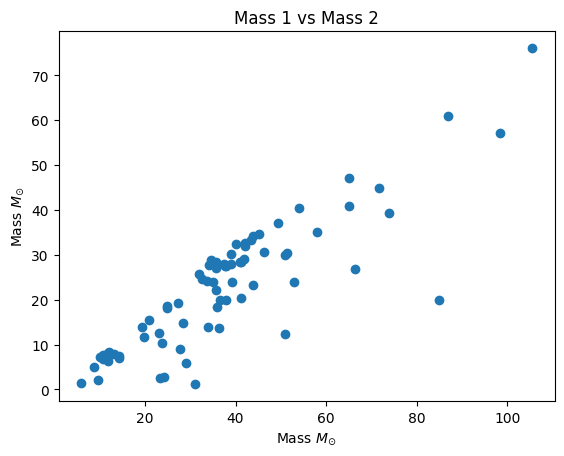

In [9]:
# 5.
plt.scatter(ligo["mass_1_source"], ligo["mass_2_source"])
plt.title("Mass 1 vs Mass 2")
plt.xlabel(r'Mass $M_{\odot}$')
plt.ylabel(r'Mass $M_{\odot}$')
print("The distribution isn't easily figured out from plotting mass 1 vs mass 2")

The minimum binary mass ratio is 1.19 and the maximum binary mass ratio is 26.58


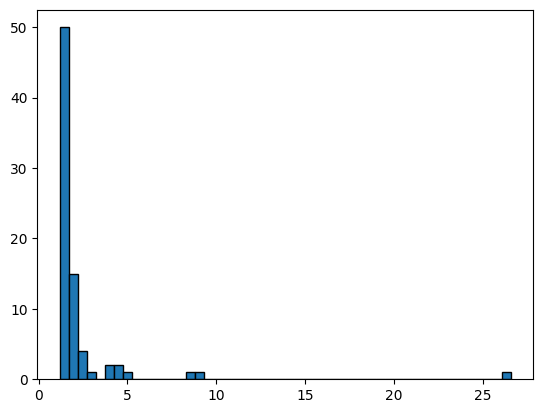

In [10]:

b_mass_r = ligo["mass_1_source"] / ligo["mass_2_source"]
plt.hist(b_mass_r, bins=50,edgecolor='black')
# plt.ylim(0,5)
print(f'The minimum binary mass ratio is {b_mass_r.min():.2f} and the maximum binary mass ratio is {b_mass_r.max():.2f}')

### 3 Standrard Sirens

In [44]:
ligo = pd.read_csv("LIGO.csv")




GW150914


In [12]:
# 1.
GW170817 = ligo.loc[ligo["commonName"] == "GW170817"]
dl = float(GW170817["luminosity_distance"].to_string(index=False))
ldu = float(GW170817["luminosity_distance_upper"].to_string(index=False))
ldl = float(GW170817["luminosity_distance_lower"].to_string(index=False))
print(f'The luminosity distance of this merger is {dl} Mpc with an uncertainty of + {ldu} and {ldl} Mpc.')

The luminosity distance of this merger is 40.0 Mpc with an uncertainty of + 7.0 and -15.0 Mpc.


2.
Using the equation 
$$
cz = H_0D_L \\
\text{we solve for} H_0 \\
H_0 = \frac{cz}{D_L} \\
\text{plugging in the equation for redshift: } z = \frac{v}{c} \\
H_0 = \frac{v}{D_L} 
$$

In [13]:
v = 3017 * (u.kilometer * u.second)

H_0 = v / dl
print(f'The Hubble Constant as calculated via this merger is {H_0:.2f} ')

The Hubble Constant as calculated via this merger is 75.42 km s 


3.
For the uncertainty: 
$$
\begin{align*}
\sigma_{H_0} = \sqrt{(\frac{\partial}{\partial v}\frac{v}{D_L})^{2}\sigma_{v}^2 + (\frac{\partial}{\partial D_L}\frac{v}{D_L})^{2}\sigma_{D_L}^2 } \\
= \sqrt{(\frac{1}{D_L})^2 \sigma_{v}^2 + (\frac{-v}{(D_L)^2})^2 \sigma_{D_L}^2} \\
 \sigma_{H_0} = \sqrt{(D_L)^{-2}\sigma_{v}^2 + \frac{v^{2}}{(D_L)^4}\sigma_{D_L}^2} \\
\end{align*} 
$$

In [14]:
sig_v = 166
sigma_H_u = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * ldu ** 2)
sigma_H_l = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * ldl ** 2)
sigma_H_a = np.sqrt(dl**-2 * sig_v**2 + (3017**2 / (dl)**4) * 11 ** 2)
print(sigma_H_u)
print(sigma_H_l)
print(sigma_H_a)

13.836401280341105
28.587206389233366
21.152963823436778


Questions
1. Is my error prop correct? Im still iffy on it.

### 4 Own Exploration

In [69]:
class Event:
    def __init__(self, Name):
        temp = pd.read_csv("LIGO.csv")
        self.specific_event = temp.loc[temp["commonName"] == Name]
        self.eventName = Name
        self.cor = self.genCor() #  method calculating correlation matrix for given eventName
        self.pearson = self.GenPr() # method calculating pearsonR matrix for given cor matrix
        self.likely_correlated = [] # liust of tuples
        self.cols = []
    def genCor(self, printDroppable = False):
        self.specific_event.drop(['id', 'commonName', 'version', 'catalog.shortName', 'GPS', 'reference', 'jsonurl'], axis = 1, inplace=True)

        corrr = self.specific_event.corr()
         # make sure this works for all events
        droppable = ["chirp_mass", "chirp_mass_lower", "chirp_mass_upper", "far_lower", "far_upper", "p_astro_upper", "p_astro_lower"]
        corr = corrr.drop(droppable, axis = 1)
        
        cor = corr.dropna()
        print
        if printDroppable:
            print(f"Due to NaN occuring in a fair number of the upper and lower bounds on some variables, \nThese {droppable} \nwere dropped from the correlation matrix")
        self.cor = cor
    def GenPr(self):
        pearsonDict = {}
        self.cols = list(self.cor.columns)
        for i in self.cols:
            temp = {}
            for j in self.cols:
                r, temp[j] = pearsonr(cor[i], cor[j])
            pearsonDict[i] = temp        
        pearsonDf = pd.DataFrame.from_dict(pearsonDict)
        self.pearson = pearsonDf
    def sift(self, threshold): # add default value for threshold ASK IN CLASS
        # if pearsonR test of var1 and var2 is below the defined threshhold for statistical significance
        # self.likely_correlated.append((var1,var2))
        for i in self.cols:
            for j in self.cols:
                if (self.pearson.loc[i][j] <= threshold):
                    self.likely_correlated.append((i, j))





In [68]:
class Trends:
    def __init__(self, ligo):
        self.ligo = pd.read_csv(ligo)
        self.names = self.ligo["commonName"]
        self.events = []
        for i in range(len(self.names)):
            temp = Event(self.names[i])
            self.events.append(temp)
        self.commonCorrs = {}
        
    def findTrends(self):
        for event in self.events:
            for cor in event.likely_correlated:
                if cor in self.commonCorrs:
                    self.commonCorrs[cor] += 1
                else:
                    self.commonCorrs[cor] = 1
    def printSignificantTrends(self, thresh): # figure out good default threshhold
        print(f"Correlations found across {thresh} events ({thresh / len(self.names):.2f} of events):")
        for i in self.commonCorrs:
            if self.commonCorrs[i] >= thresh:
                print(self.commonCorrs[i])
    def graph_n_most_significant(self, n):
        fig, ax = plt.subplots(1, n)
        for i in range(n):
            values = list(self.commonCorrs.values())
            
            keys = list(self.commonCorrs.keys())
            x, y = keys[values.index(max(values))]
            ax[i].scatter(self.ligo[x], self.ligo[y])
            ax[i].xlabel(x)
            ax[i].ylabel(y)
            ax[i].title(f'{x} vs {y}')
trends = Trends("LIGO.csv")

/var/folders/49/jglncchd4kq4tz1l5xyjj7h40000gn/T/ipykernel_9966/3167233701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.specific_event.drop(['id', 'commonName', 'version', 'catalog.shortName', 'GPS', 'reference', 'jsonurl'], axis = 1, inplace=True)


AttributeError: 'NoneType' object has no attribute 'columns'

In [15]:
cols = list(ligo.columns)
ligo.fillna(0, inplace=True)


In [16]:
# RUN THIS CELL ONLY ONCE
# Once Columns are dropped they stay dropped
quant = ligo

quant.drop(['id', 'commonName', 'version', 'catalog.shortName', 'GPS', 'reference', 'jsonurl'], axis = 1, inplace=True)
cols = list(quant.columns)

In [28]:
corrr = quant.corr()
droppable = ["chirp_mass", "chirp_mass_lower", "chirp_mass_upper", "far_lower", "far_upper", "p_astro_upper", "p_astro_lower"]
corr = corrr.drop(droppable, axis = 1)

cor = corr.dropna()
print(f"Due to NaN occuring in a fair number of the upper and lower bounds on some variables, \nThese {droppable} \nwere dropped from the correlation matrix")

Due to NaN occuring in a fair number of the upper and lower bounds on some variables, 
These ['chirp_mass', 'chirp_mass_lower', 'chirp_mass_upper', 'far_lower', 'far_upper', 'p_astro_upper', 'p_astro_lower'] 
were dropped from the correlation matrix


As some of these correlations don't have the information needed to provide an accurate correlation coefficient I dropped them from this correlation matrix table.

In [58]:
cor
cols = list(cor.columns)

3

In [40]:
pearsonDict = {}
for i in cols:
    temp = {}
    for j in cols:
        r, temp[j] = pearsonr(cor[i], cor[j])
    pearsonDict[i] = temp        
pearsonDict
pearsonDf = pd.DataFrame.from_dict(pearsonDict)
pearsonDf

,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,...,chirp_mass_source_lower,chirp_mass_source_upper,redshift,redshift_lower,redshift_upper,far,p_astro,final_mass_source,final_mass_source_lower,final_mass_source_upper
mass_1_source,0.000000e+00,2.952065e-17,1.246870e-11,7.681062e-21,7.144420e-31,1.413249e-25,2.186359e-05,2.249948e-06,3.867973e-06,3.136846e-16,...,1.630534e-33,2.890195e-22,1.037333e-16,3.820235e-16,2.758241e-13,1.549977e-02,0.229203,3.508650e-34,1.231781e-18,3.806204e-13
mass_1_source_lower,2.952065e-17,7.230709e-213,8.094217e-21,3.753804e-11,2.104759e-15,3.659050e-23,1.609188e-08,1.434990e-10,2.236819e-10,1.007265e-22,...,1.168080e-18,6.214730e-26,6.433552e-23,1.256152e-23,2.525131e-24,3.388679e-04,0.025754,5.845433e-15,6.873241e-34,5.157248e-24
mass_1_source_upper,1.246870e-11,8.094217e-21,0.000000e+00,6.090546e-08,8.245046e-11,2.044474e-14,1.111211e-09,4.955593e-13,7.658591e-14,2.675472e-15,...,1.565564e-12,5.386165e-16,2.843388e-15,6.506532e-16,5.066937e-20,3.434831e-05,0.007280,2.408078e-10,4.748794e-19,4.057670e-34
mass_2_source,7.681062e-21,3.753804e-11,6.090546e-08,7.230709e-213,1.989998e-23,1.815141e-15,9.768584e-04,2.682206e-04,3.905596e-04,5.153927e-11,...,6.039683e-19,4.198612e-14,2.524420e-11,6.254192e-11,5.890683e-09,9.998037e-02,0.629649,2.892281e-25,4.349177e-12,6.051949e-09
mass_2_source_lower,7.144420e-31,2.104759e-15,8.245046e-11,1.989998e-23,7.230709e-213,1.468906e-22,4.244728e-05,7.840119e-06,1.101391e-05,1.822501e-14,...,8.853396e-31,2.491595e-20,6.805960e-15,1.705361e-14,3.917765e-12,2.002270e-02,0.251361,2.699745e-34,5.957291e-17,3.324090e-12
mass_2_source_upper,1.413249e-25,3.659050e-23,2.044474e-14,1.815141e-15,1.468906e-22,7.230709e-213,7.123515e-07,5.496295e-08,9.464447e-08,4.631302e-21,...,1.367952e-29,3.959121e-36,1.053057e-21,2.388793e-21,9.751849e-18,2.338337e-03,0.078791,1.343855e-21,2.689311e-26,2.233381e-16
network_matched_filter_snr,2.186359e-05,1.609188e-08,1.111211e-09,9.768584e-04,4.244728e-05,7.123515e-07,7.230709e-213,1.293376e-14,2.120415e-12,6.127532e-09,...,6.699207e-06,2.374753e-07,7.580384e-09,3.771030e-09,1.348714e-10,1.020624e-06,0.000120,7.768916e-05,3.594926e-08,3.101063e-09
network_matched_filter_snr_lower,2.249948e-06,1.434990e-10,4.955593e-13,2.682206e-04,7.840119e-06,5.496295e-08,1.293376e-14,0.000000e+00,3.142143e-23,6.673105e-10,...,9.163638e-07,1.254976e-08,7.625626e-10,3.406929e-10,6.956260e-13,1.090325e-07,0.001586,1.138962e-05,5.878885e-10,4.883177e-12
network_matched_filter_snr_upper,3.867973e-06,2.236819e-10,7.658591e-14,3.905596e-04,1.101391e-05,9.464447e-08,2.120415e-12,3.142143e-23,0.000000e+00,4.185701e-09,...,1.460744e-06,1.750544e-08,4.807895e-09,1.917457e-09,1.711595e-12,2.387652e-09,0.000676,1.816268e-05,7.041197e-10,1.951242e-12
luminosity_distance,3.136846e-16,1.007265e-22,2.675472e-15,5.153927e-11,1.822501e-14,4.631302e-21,6.127532e-09,6.673105e-10,4.185701e-09,7.230709e-213,...,2.752652e-17,1.222944e-21,1.270112e-47,1.966139e-44,4.372988e-23,7.437117e-04,0.033895,2.275263e-14,4.024662e-22,7.227964e-17


The first thing I noticed based on the pearsonR matrix is that the correlation coefficients of upper and lower bounds in reference to the variables they are bounded on are highly unlikely to be found in uncorrelated data. This is a pretty obvious and expected result.

My next step is to eliminate the correlations that are likely to be found in uncorrelated data. An important note is